https://www.kaggle.com/mansoordaku/ckdisease/downloads/ckdisease.zip/1
    
## 本次目標：以多項數據，預測該病患具有慢性腎病

## 我們使用以下表示來收集數據集
年齡 - 年齡

bp  - 血壓

sg  - 比重

al -蛋白

su - 糖

rbc  - 紅細胞

pc  - 膿細胞

pcc  - 膿細胞團塊

ba - 細菌

bgr  - 血糖隨機

埠 - 血尿素

sc  - 血清肌酐

sod - 鈉

pot - 鉀

hemo - 血紅蛋白

pcv  - 包裝細胞體積

wc  - 白細胞計數

rc  - 紅細胞計數

htn - 高血壓

dm  - 糖尿病

cad	-	coronary artery disease 冠心病

appet  - 食慾

pe  - 腳蹬水腫

ANE  - 貧血

class	-	class種類

## 目標欄位：

### 目標是'分類'，它是'ckd'或'notckd' -  ckd =慢性腎病

* classfication	-	class種類



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

sns.set_style("whitegrid") # 設置畫圖的風格
sns.set_context("paper") 
df = pd.read_csv("kidney_disease.csv") #讀取CSV檔
df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

## 查看目標 : << classification >> 佔資料的比例有多少
## 以圖表呈現

classification欄位的資料型態為<class 'str'>


c:\users\cia_rookie\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\cia_rookie\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


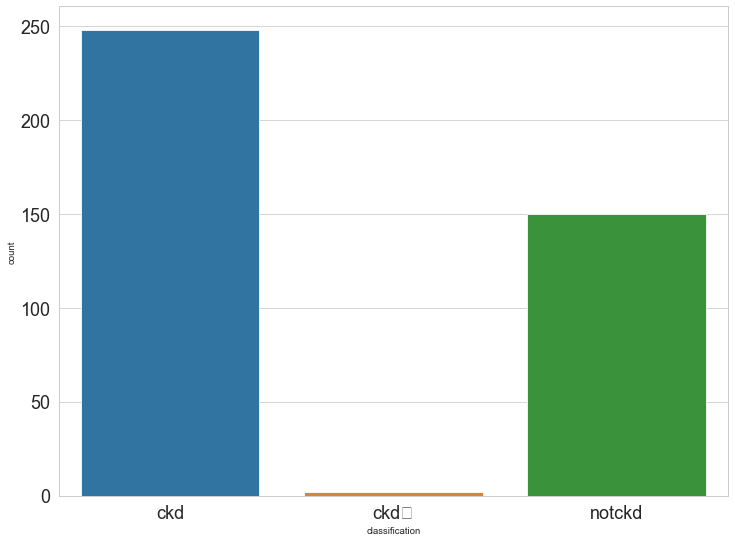

In [4]:
df['classification'].value_counts

name = 'classification'

def count(name):
    test_list = []
    c = Counter(df[name])
    for i in df[name]:
        test_list.append(i)
    return c.most_common() , test_list ,type(df[name][0])

ans = count(name)
ans[0]
print(str(name)+"欄位的資料型態為"+str(ans[2]))
# 畫圖可參考 https://ithelp.ithome.com.tw/articles/10186624

df2 = pd.DataFrame({name: ans[1]})
f, ax = plt.subplots(figsize=(12, 9))
ax.tick_params(labelsize=18)
sns.countplot(x = name, data = df2)

In [5]:
condition = df['classification']!='ckd'
df['classification'] = np.where(condition,1,0)

classification欄位的資料型態為<class 'numpy.int32'>


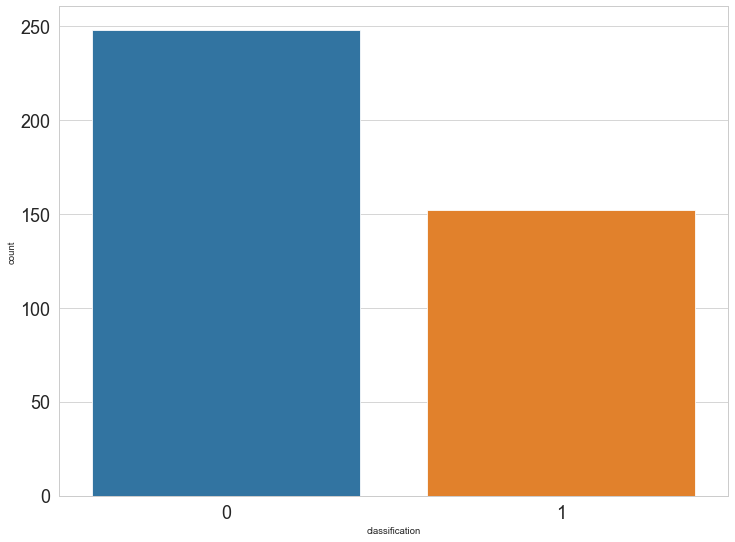

In [6]:
df['classification'].value_counts

name = 'classification'

def count(name):
    test_list = []
    c = Counter(df[name])
    for i in df[name]:
        test_list.append(i)
    return c.most_common() , test_list ,type(df[name][0])

ans = count(name)
ans[0]
print(str(name)+"欄位的資料型態為"+str(ans[2]))
# 畫圖可參考 https://ithelp.ithome.com.tw/articles/10186624

df2 = pd.DataFrame({name: ans[1]})
f, ax = plt.subplots(figsize=(12, 9))
ax.tick_params(labelsize=18)
sns.countplot(x = name, data = df2)

In [7]:
## dropna可去掉包含nan的行或列
df.dropna(
    axis=0,     # 0: 对行进行操作; 1: 对列进行操作
    how='any',   # 'any': 只要存在 NaN 就 drop 掉; 'all': 必须全部是 NaN 才 drop 
    inplace=True)
df = df.reset_index(drop=True)

## 檢查是否還有缺失值
df.isnull().sum(axis=0)


id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 26 columns):
id                158 non-null int64
age               158 non-null float64
bp                158 non-null float64
sg                158 non-null float64
al                158 non-null float64
su                158 non-null float64
rbc               158 non-null object
pc                158 non-null object
pcc               158 non-null object
ba                158 non-null object
bgr               158 non-null float64
bu                158 non-null float64
sc                158 non-null float64
sod               158 non-null float64
pot               158 non-null float64
hemo              158 non-null float64
pcv               158 non-null object
wc                158 non-null object
rc                158 non-null object
htn               158 non-null object
dm                158 non-null object
cad               158 non-null object
appet             158 non-null object
pe         

## one hot encoding

In [9]:
df2 = pd.get_dummies(df)

In [10]:
# df2.to_csv("resize_data.csv")

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model , metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

## 標準化

In [12]:
y = df2['classification']
df2 = df2.drop('classification',axis=1)
X = preprocessing.scale(df2)


## 切分資料

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.5,
                                                 random_state=2)
X_train.shape,X_test.shape

((79, 178), (79, 178))

## 使用GradientBoosting預測

### 隨機森林使⽤的集成⽅方法稱為 Bagging

### 用抽樣的資料與 features 生成每一棵樹，最後再取平均

### Boosting 則是另⼀種集成⽅方法，希望能夠由後面生成的樹，來修正前樹學不好的地⽅


![title](1.png)

![title](2.png)

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
# 建立模型
model = GradientBoostingClassifier()

# 訓練模型
model.fit(X_train, y_train)

# 預測測試集
y_pred = model.predict(X_test)

In [16]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9240506329113924


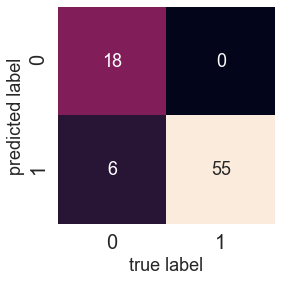

In [17]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.5)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('true label')
plt.ylabel('predicted label');

Q&A：

Ｑ：隨機森林與梯度提升機的特徵重要性結果不相同？

Ａ：決策樹計算特徵重要性的概念是，觀察某一特徵被用來切分的次數而定。

假設有兩個一模一樣的特徵，在隨機森林中每棵樹皆為獨立，因此兩個特徵皆有可能被使用

最終統計出來的次數會被均分。在梯度提升機中，每棵樹皆有關連，因此模型僅會使用其中一個特徵

另一個相同特徵的重要性則會消失
